# IRIS FLOWER CLASSIFICATION

## Dataset:-

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper
The Use of multiple measurements in Taxonomic Problems. It is sometimes called Anderson's Iris data set because Edgar Anderson
collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples
from each of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the
length and the width of the sepals and petals, in centimeters.
This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector
machines.

## Objective:-

The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on
their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species.
Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris
flowers into their respective species.
Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory classification tasks.

## Part 1: Importing Libraries and Loading Dataset

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load Dataset
df = pd.read_csv("IRIS Flower.csv")

## Part 2: Exploratory Data Analysis (EDA)

In [2]:
# Dataset First Look
df.head()

# Dataset Rows & Columns count
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

# Dataset Info
df.info()

# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

Number of rows are:  150
Number of columns are:  5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
number of duplicated rows are 3


## Part 3: Data Wrangling

In [4]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

## Part 4: Data Visualization

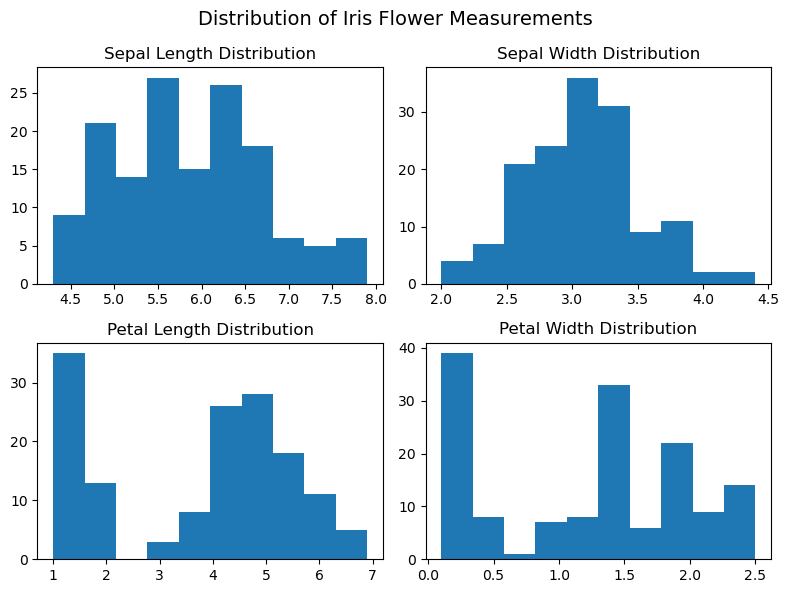

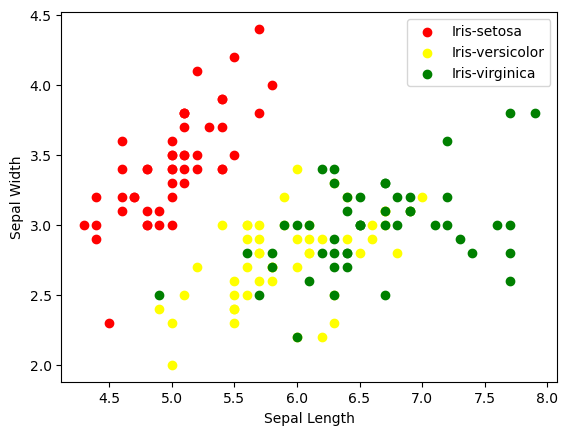

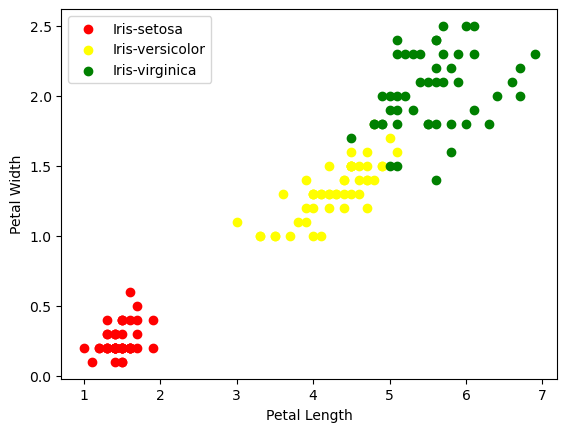

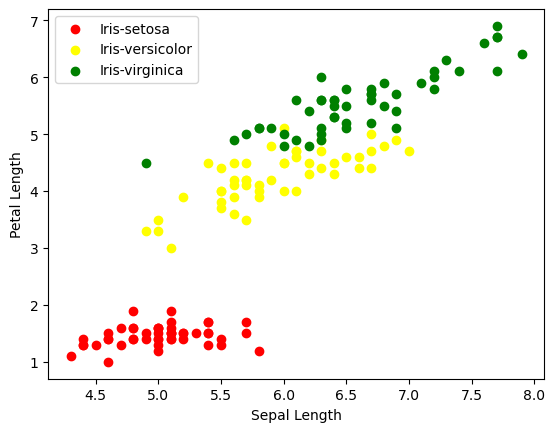

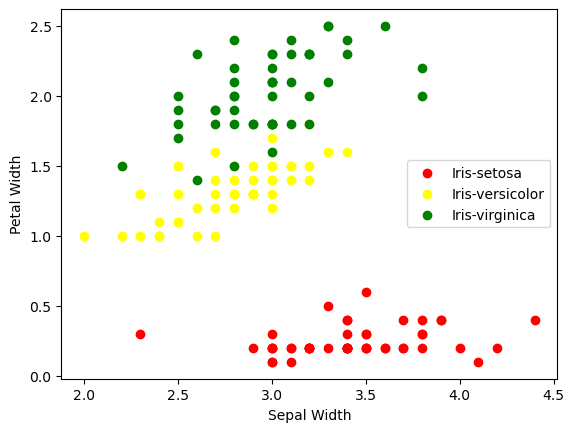

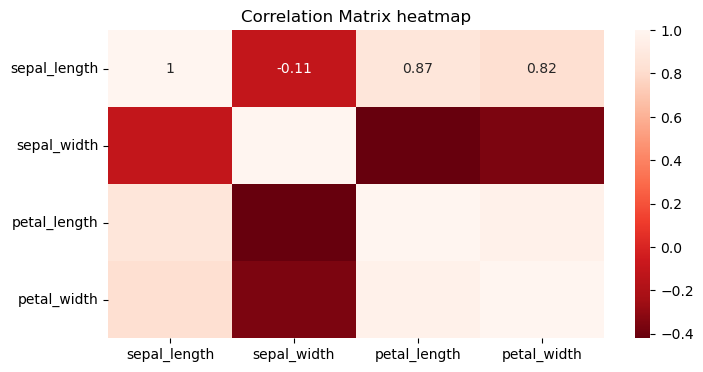

In [8]:
# Distribution of Numerical Variables
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)
plt.subplot(2, 2, 1)
plt.hist(df['sepal_length'])
plt.title('Sepal Length Distribution')
plt.subplot(2, 2, 2)
plt.hist(df['sepal_width'])
plt.title('Sepal Width Distribution')
plt.subplot(2, 2, 3)
plt.hist(df['petal_length'])
plt.title('Petal Length Distribution')
plt.subplot(2, 2, 4)
plt.hist(df['petal_width'])
plt.title('Petal Width Distribution')
plt.tight_layout()
plt.show()

# Sepal Length vs Sepal Width
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

# Petal Length vs Petal Width
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

# Sepal Length vs Petal Length
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

# Sepal Width vs Petal Width
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

# Calculate correlation matrix (excluding non-numeric column 'species')
numeric_df = df.drop(columns=['species'])
corr_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')
plt.title('Correlation Matrix heatmap')
plt.show()

## Part 5: Feature Engineering & Data Pre-processing

In [10]:
# Encode the categorical column 'Species'
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
unique_species = df['species'].unique()
print("Encoded Species Values:")
print(unique_species)

Encoded Species Values:
[0 1 2]


## Part 6: Data Scaling and Splitting

In [11]:
# Defining the X and y
x = df.drop(columns=['species'], axis=1)
y = df['species']

# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Checking the train distribution of dependent variable
y_train.value_counts()

species
0    35
1    35
2    32
Name: count, dtype: int64

## Part 7: ML Model Implementation and Evaluation


Confusion Matrix:


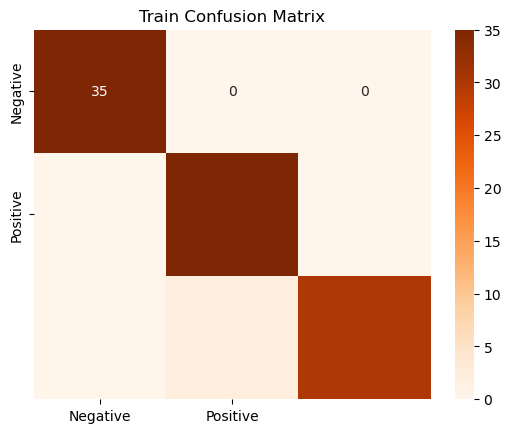

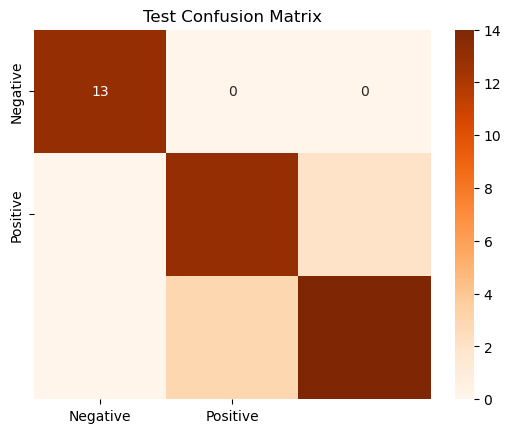


Train Classification Report:
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   35.000000
1              0.945946  1.000000  0.972222   35.000000
2              1.000000  0.937500  0.967742   32.000000
accuracy       0.980392  0.980392  0.980392    0.980392
macro avg      0.981982  0.979167  0.979988  102.000000
weighted avg   0.981452  0.980392  0.980348  102.000000

Test Classification Report:
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  13.000000
1              0.812500  0.866667  0.838710  15.000000
2              0.875000  0.823529  0.848485  17.000000
accuracy       0.888889  0.888889  0.888889   0.888889
macro avg      0.895833  0.896732  0.895732  45.000000
weighted avg   0.890278  0.888889  0.888998  45.000000

Confusion Matrix:


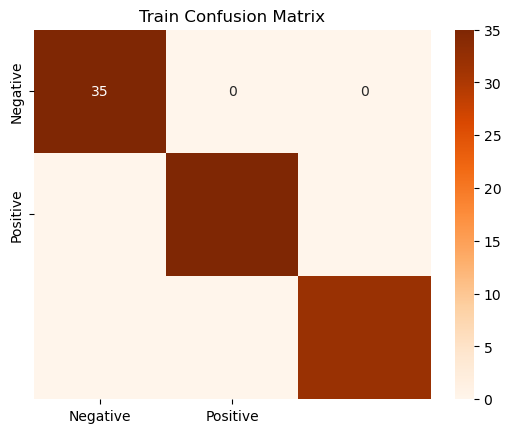

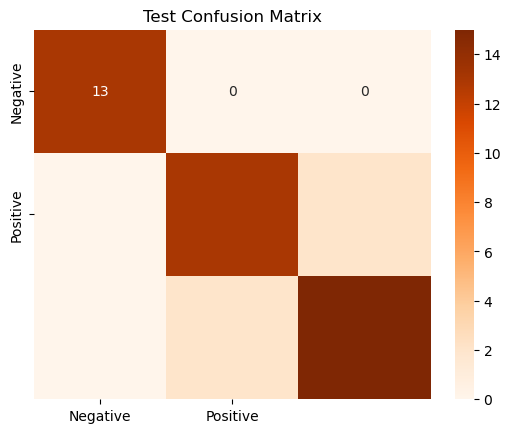


Train Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     35.0
1                   1.0     1.0       1.0     35.0
2                   1.0     1.0       1.0     32.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    102.0
weighted avg        1.0     1.0       1.0    102.0

Test Classification Report:
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  13.000000
1              0.866667  0.866667  0.866667  15.000000
2              0.882353  0.882353  0.882353  17.000000
accuracy       0.911111  0.911111  0.911111   0.911111
macro avg      0.916340  0.916340  0.916340  45.000000
weighted avg   0.911111  0.911111  0.911111  45.000000

Confusion Matrix:


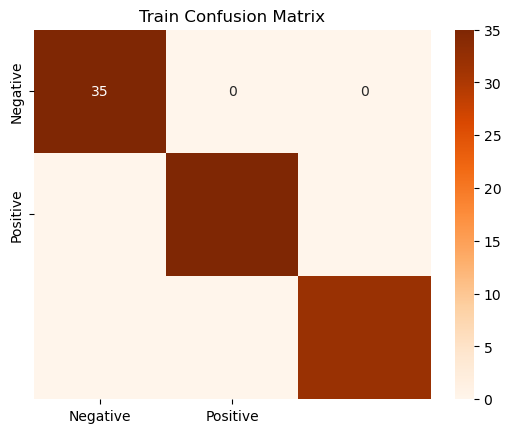

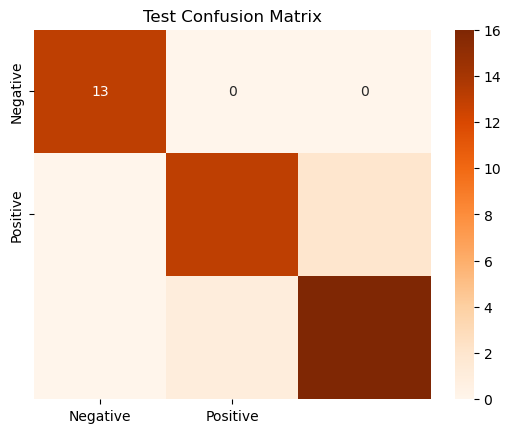


Train Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     35.0
1                   1.0     1.0       1.0     35.0
2                   1.0     1.0       1.0     32.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    102.0
weighted avg        1.0     1.0       1.0    102.0

Test Classification Report:
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  13.000000
1              0.928571  0.866667  0.896552  15.000000
2              0.888889  0.941176  0.914286  17.000000
accuracy       0.933333  0.933333  0.933333   0.933333
macro avg      0.939153  0.935948  0.936946  45.000000
weighted avg   0.934215  0.933333  0.933136  45.000000

Confusion Matrix:


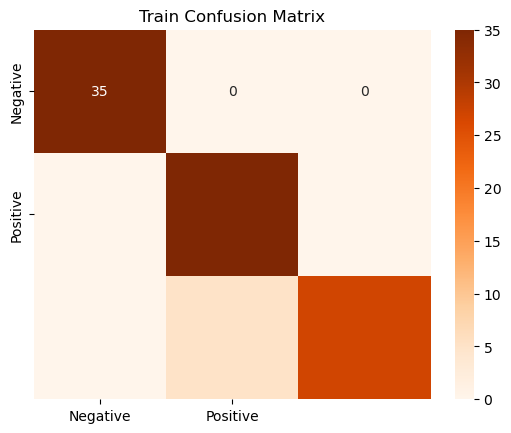

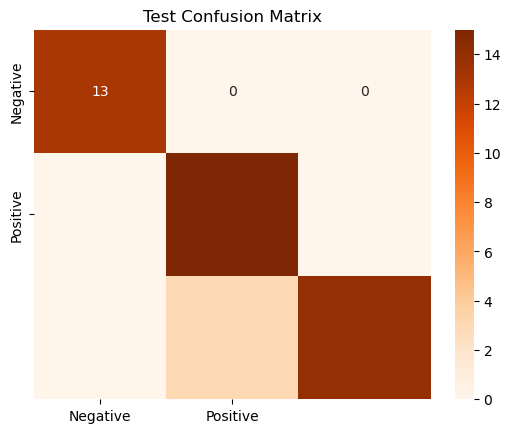


Train Classification Report:
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000   35.00000
1              0.875000  1.000000  0.933333   35.00000
2              1.000000  0.843750  0.915254   32.00000
accuracy       0.950980  0.950980  0.950980    0.95098
macro avg      0.958333  0.947917  0.949529  102.00000
weighted avg   0.957108  0.950980  0.950537  102.00000

Test Classification Report:
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  13.000000
1              0.833333  1.000000  0.909091  15.000000
2              1.000000  0.823529  0.903226  17.000000
accuracy       0.933333  0.933333  0.933333   0.933333
macro avg      0.944444  0.941176  0.937439  45.000000
weighted avg   0.944444  0.933333  0.933138  45.000000

Confusion Matrix:


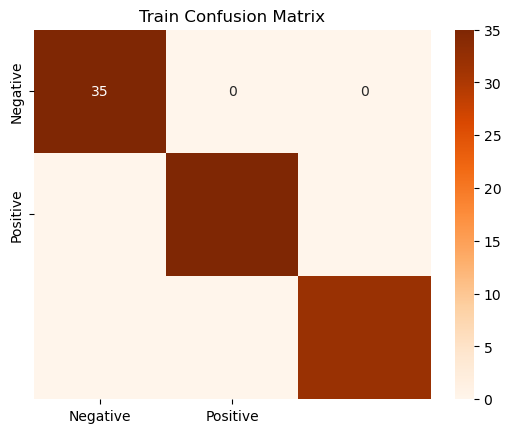

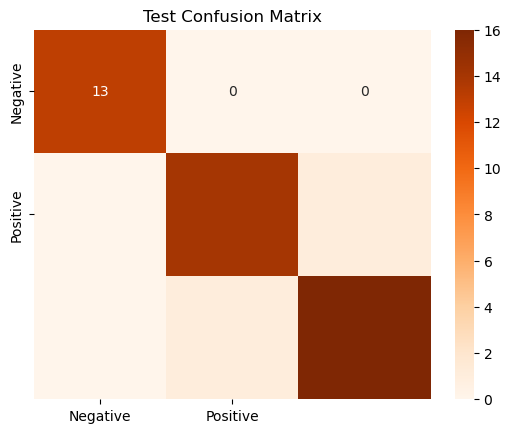


Train Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     35.0
1                   1.0     1.0       1.0     35.0
2                   1.0     1.0       1.0     32.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    102.0
weighted avg        1.0     1.0       1.0    102.0

Test Classification Report:
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  13.000000
1              0.933333  0.933333  0.933333  15.000000
2              0.941176  0.941176  0.941176  17.000000
accuracy       0.955556  0.955556  0.955556   0.955556
macro avg      0.958170  0.958170  0.958170  45.000000
weighted avg   0.955556  0.955556  0.955556  45.000000

Confusion Matrix:


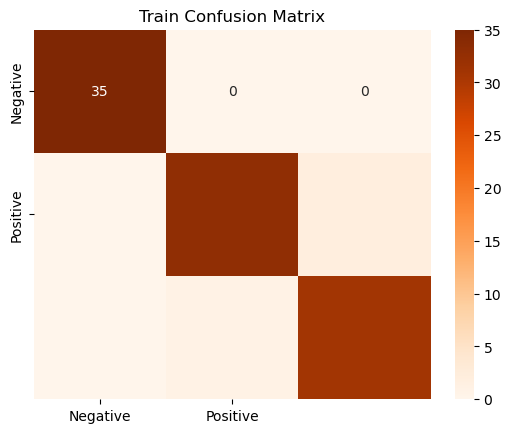

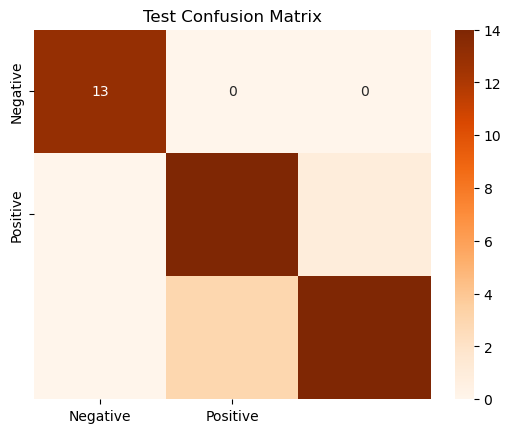


Train Classification Report:
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   35.000000
1              0.970588  0.942857  0.956522   35.000000
2              0.939394  0.968750  0.953846   32.000000
accuracy       0.970588  0.970588  0.970588    0.970588
macro avg      0.969994  0.970536  0.970123  102.000000
weighted avg   0.970894  0.970588  0.970601  102.000000

Test Classification Report:
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  13.000000
1              0.823529  0.933333  0.875000  15.000000
2              0.933333  0.823529  0.875000  17.000000
accuracy       0.911111  0.911111  0.911111   0.911111
macro avg      0.918954  0.918954  0.916667  45.000000
weighted avg   0.915991  0.911111  0.911111  45.000000

Confusion Matrix:


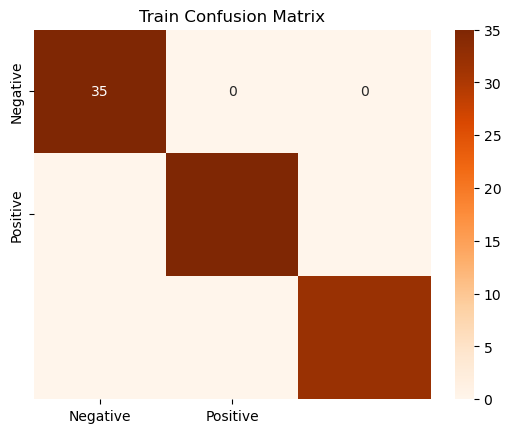

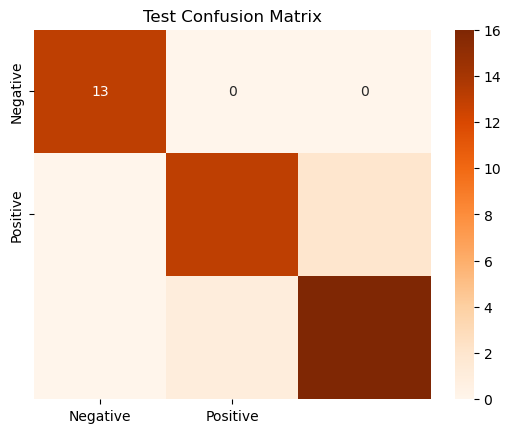


Train Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     35.0
1                   1.0     1.0       1.0     35.0
2                   1.0     1.0       1.0     32.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    102.0
weighted avg        1.0     1.0       1.0    102.0

Test Classification Report:
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  13.000000
1              0.928571  0.866667  0.896552  15.000000
2              0.888889  0.941176  0.914286  17.000000
accuracy       0.933333  0.933333  0.933333   0.933333
macro avg      0.939153  0.935948  0.936946  45.000000
weighted avg   0.934215  0.933333  0.933136  45.000000

Model Evaluation Scores:
                 Logistic Regression  Decision Tree  Random Forest  \
Precision Train             0.981452       1.000000       1.000000   
Precision Test              0.890

In [12]:
# Function to evaluate model performance
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    # Displaying confusion matrices
    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g')
    plt.title("Train Confusion Matrix")
    plt.show()
    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g')
    plt.title("Test Confusion Matrix")
    plt.show()
    # Classification Reports
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    print(pd.DataFrame(cr_train).T)
    print("\nTest Classification Report:")
    print(pd.DataFrame(cr_test).T)
    # Evaluation Metrics
    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']
    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']
    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test]
    return model_score

# Create a DataFrame to store model scores
score = pd.DataFrame(index=['Precision Train', 'Precision Test', 'Recall Train', 'Recall Test', 'Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

# ML Model - 1: Logistic regression
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)
score['Logistic Regression'] = lr_score

# ML Model - 2: Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)
score['Decision Tree'] = dt_score

# ML Model - 3: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)
score['Random Forest'] = rf_score

# ML Model - 4: Support Vector Machine
svm_model = SVC(kernel='rbf')
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)
score['Support Vector Machine'] = svm_score

# ML Model - 5: Multi-layer Perceptron Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp_score = evaluate_model(mlp_model, x_train, x_test, y_train, y_test)
score['Multi-layer Perceptron'] = mlp_score

# ML Model - 6: Gaussian Naive Bayes Classifier
gnb_model = GaussianNB()
gnb_score = evaluate_model(gnb_model, x_train, x_test, y_train, y_test)
score['Gaussian Naive Bayes'] = gnb_score

# ML Model - 7: Extreme Gradient Boosting Classifier
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)
score['XGBoost'] = xgb_score

# Displaying Model Scores
print("\nModel Evaluation Scores:")
print(score)


## Part 8: Conclusion and Model Selection


The best model based on highest accuracy score is: Multi-layer Perceptron


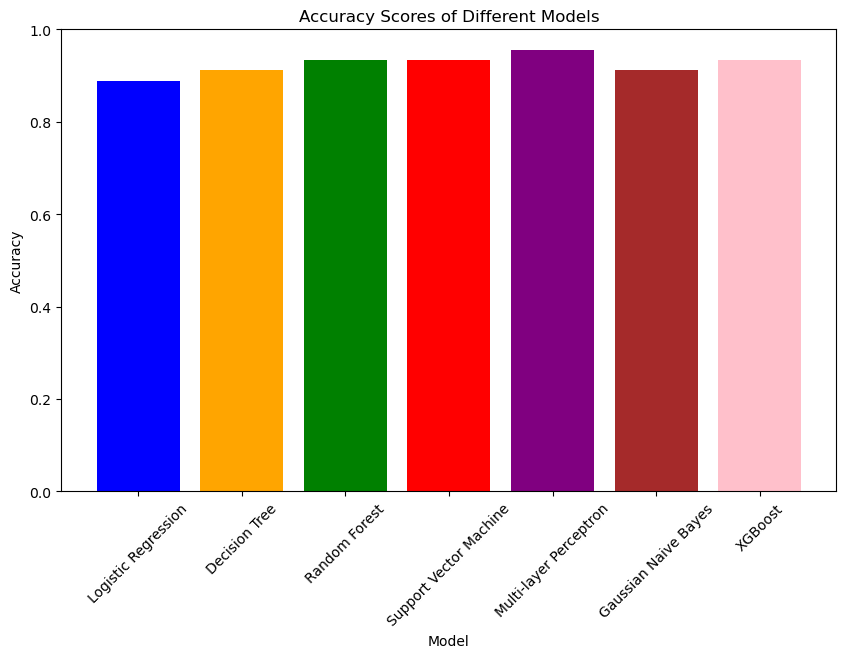

In [14]:
# Selecting the best model based on highest accuracy score
best_model = score.loc['Accuracy Test'].idxmax()
print(f"\nThe best model based on highest accuracy score is: {best_model}")

# Plotting Accuracy Scores
plt.figure(figsize=(10, 6))
plt.bar(score.columns, score.loc['Accuracy Test'], color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()